# LINEAR REGRESSION

Linear Regression is a statistical model that attempts to show the relationship between two variables using a Linear Equation.

### What is Regression?

Regression analysis is a form of predictive modeling technique that investigates the relationship between a dependent and independent variable.

So, in linear regression, we establish a relationship between the independent and dependent variables by fitting the best line. This best fit line is known as the regression line and represented by a linear equation.

**y = mx + C**

## Graphical Representation

## R-Squared Method

R-Squared value is a statistical measure of how close the data points are to the fitted regression line. This is also known as **Coefficient of determination** or **Coefficient of multiple determination**.

We will be using a simple dataset to implement this algorithm. This dataset contains Head Size (cm^3) and Brain Weight (grams) where Head Size is an independent variable. 

Download the dataset from here.

We will implement this mathematically first.

## So let's begin here...

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [5]:
#Reading Data
data = pd.read_csv('headbrain.csv')

In [6]:
#Collecting X and Y

X=data['Head Size(cm^3)'].values
Y=data['Brain Weight(grams)'].values

In [7]:
#Mean of X and Y

mean_x = np.mean(X)
mean_y = np.mean(Y)
print(data.head())

   Gender  Age Range  Head Size(cm^3)  Brain Weight(grams)
0       1          1             4512                 1530
1       1          1             3738                 1297
2       1          1             4261                 1335
3       1          1             3777                 1282
4       1          1             4177                 1590


In [8]:
#Total number of Values
n = len(X)

In [9]:
#Using formula to calculate m and c
numer = 0
denom = 0
for i in range (n):
    numer += (X[i]-mean_x) * (Y[i]-mean_y)
    denom += (X[i]-mean_x)**2

In [10]:
m = numer/denom
c = mean_y - m * mean_x

In [11]:
#Plotting Graph
max_x = np.max(X) + 100
min_x = np.min(X) - 100

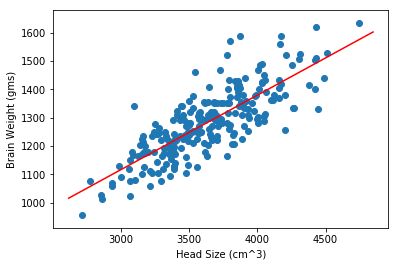

In [12]:
#Calculating linvalues of x and y
x = np.linspace(min_x,max_x,1000)
y = m*x + c

plt.plot(x,y,color = 'red' ,label='Regression Line')
plt.scatter(X,Y,label='Scatter Plot')
plt.xlabel('Head Size (cm^3)')
plt.ylabel('Brain Weight (gms)')
plt.show()

In [13]:
snumer = 0
sdenom = 0
for i in range(n):
    yp = m*X[i] + c
    snumer += (yp-mean_y)**2
    sdenom += (Y[i] - mean_y)**2

r2 = (snumer/sdenom)
print('R^2 value: ',r2)

R^2 value:  0.6393117199570001


In [14]:
# Using sklearn ML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))

In [15]:
#Creating model
model = LinearRegression()

#Fitting Training data
model = model.fit(X,Y)

In [16]:
pickle.dump(model, open('model.pkl','wb'))

In [17]:
Y_pred = model.predict(X)

#Calculating R2
r2 = model.score(X,Y)
print('Using sklearn')
print('R^2 value: ',r2)

Using sklearn
R^2 value:  0.639311719957
